In [14]:
# Excel-Datei einlesen und Daten für weitere Verarbeitung vorbereiten; ausschließen von VP, deren Werte nicht in den Berechnugen enthalten sein sollen

import pandas as pd

df_raw = pd.read_excel("Rohdaten_Fragebogen_anonymisiert.xlsx", header=None)

df_raw.columns = df_raw.iloc[0]

descriptions = df_raw.iloc[1]

df = df_raw.iloc[2:].copy()

df.columns = df_raw.iloc[0]

id_to_vp = {
    105: 'VP1', 113: 'VP2', 122: 'VP3', 123: 'VP4', 125: 'VP5',
    126: 'VP6', 127: 'VP7', 128: 'VP8', 129: 'VP9', 130: 'VP10',
    131: 'VP11', 132: 'VP12', 133: 'VP13', 135: 'VP14', 136: 'VP15',
    137: 'VP16'
}

df['VP'] = df['CASE'].map(id_to_vp)

# VPs ausschließen
exclude_vps = ['VP7', 'VP8']

# alle Zeilen außer die der ausgeschlossenen VPs behalten
df = df[~df['VP'].isin(exclude_vps)]

# nicht ausgeschlossene VPs ausgeben
print(df['VP'].unique())



['VP1' 'VP2' 'VP3' 'VP4' 'VP5' 'VP6' 'VP9' 'VP10' 'VP11' 'VP12' 'VP13'
 'VP14' 'VP15' 'VP16']


In [5]:
# Variablen und Fragen der Fragebögen zu den einzelnen Modi

fragen = {
    
    'Steuerung': {
        '1': ['ST01_01', 'ST03_01', 'ST05_01'],
        '2': ['ST01_02', 'ST03_02', 'ST05_02'],
        '3': ['ST01_03', 'ST03_03', 'ST05_03'],
        '4': ['ST01_04', 'ST03_04', 'ST05_04'],
        '5': ['ST01_05', 'ST03_05', 'ST05_05'],
        '6': ['ST01_06', 'ST03_06', 'ST05_06']
    },
    
    'Klanggestaltung': {
        '1': ['KG01_01', 'KG06_01', 'KG07_01'],
        '2': ['KG01_02', 'KG06_02', 'KG07_02'],
        '3': ['KG01_03', 'KG06_03', 'KG07_03'],
        '4': ['KG01_04', 'KG06_04', 'KG07_04'],
        '5': ['KG01_05', 'KG06_05', 'KG07_05'],
        '6': ['KG01_06', 'KG06_06', 'KG07_06'],
        '7': ['KG02_01', 'KG04_01', 'KG05_01'],
        '8': ['KG02_02', 'KG04_02', 'KG05_02'],
        '9': ['KG02_03', 'KG04_03', 'KG05_03'],
        '10': ['KG02_04', 'KG04_04', 'KG05_04'],
        '11': ['KG02_05', 'KG04_05', 'KG05_05'],
        '12': ['KG02_06', 'KG04_06', 'KG05_06'],
        '13': ['KG02_07', 'KG04_07', 'KG05_07'],
        '14': ['KG02_08', 'KG04_08', 'KG05_08'],
        '15': ['KG02_09', 'KG04_09', 'KG05_09']
    },
    
    'Agency': {
        '1': ['AG02_01', 'AG03_01', 'AG04_01'],
        '2': ['AG02_02', 'AG03_02', 'AG04_02']
    },
    
    'PhysicalPresence': {
        '1': ['PP01_02', 'PP02_01', 'PP03_01']
    },
    
    'CogLoadEnv': {
        '1': ['EC01_01', 'EC03_01', 'EC04_01']
    },
    
    'SituationalInterest': {
        '1': ['SI01_01', 'SI02_01', 'SI03_01'],
        '2': ['SI01_02', 'SI02_02', 'SI03_02'],
        '3': ['SI01_03', 'SI02_03', 'SI03_03'],
        '4': ['SI01_04', 'SI02_04', 'SI03_04'],
        '5': ['SI01_05', 'SI02_05', 'SI03_05'],
        '6': ['SI01_06', 'SI02_06', 'SI03_06']
    },
    
    'EmbodiedLearning': {
        '1': ['EL01_01', 'EL02_01', 'EL03_01'],
        '2': ['EL01_02', 'EL02_02', 'EL03_02'],
        '3': ['EL01_03', 'EL02_03', 'EL03_03']
    },


    'SelfEfficancy': {
        '1': ['SE01_01', 'SE02_01', 'SE03_01'],
        '2': ['SE01_02', 'SE02_02', 'SE03_02'],
        '3': ['SE01_03', 'SE02_03', 'SE03_03'],
        '4': ['SE01_04', 'SE02_04', 'SE03_04']
    }

}

fragen_text = {
    
    'Steuerung': {
        '1': "Die Interaktionsmethode war mir sehr klar.",
        '2': "Die Steuerung war leicht zu meistern.",
        '3': "Die Steuerung war angenehm.",
        '4': "Die Steuerung war intuitiv.",
        '5': "Ich habe sofort verstanden, was ich machen muss.",
        '6': "Die Steuerung war nicht anstrengend."
    },
    
    'Klanggestaltung': {
        '1': "Die Steuerung war präzise.",
        '2': "Die Steuerung hat mir dabei geholfen, ein Gefühl für den Rhythmus zu bekommen.",
        '3': "Die Steuerung hat mein Rhythmusgefühl unterstützt.",
        '4': "Die Steuerung hat das Erlernen des Rhythmusgefühls erleichtert.",
        '5': "Die Art der Steuerung war für das Erlernen des Rhythmusgefühls effektiv.",
        '6': "Die Steuerung und die Töne haben sich wie eine Einheit angefühlt.",
        '7': "Ich hatte das Gefühl, dass ich die komplette Kontrolle über die Geschwindigkeit des Balkens hatte.",
        '8': "Ich hatte das Gefühl, dass ich die komplette Kontrolle über die Lautstärke der Töne hatte.",
        '9': "Es war einfach, die Geschwindigkeit zu halten.",
        '10': "Ich konnte mit der Geschwindigkeit experimentieren.",
        '11': "Ich konnte mit der Lautstärke experimentieren.",
        '12': "Ich konnte die Geschwindigkeit des Balkens gut nach meinen Vorstellungen anpassen.",
        '13': "Ich konnte die Lautstärke der Töne gut nach meinen Vorstellungen anpassen.",
        '14': "Ich habe die Steuerung der Geschwindigkeit als natürlich empfunden.",
        '15': "Ich habe die Steuerung der Lautstärke als natürlich empfunden."
    },
    
    'Agency': {
        '1': "Ich hatte in der VR-Umgebung das Gefühl, dass meine Erlebnisse und Handlungen unter meiner Kontrolle sind.",
        '2': "Ich hatte in der VR-Umgebung das Gefühl, dass meine Erlebnisse und Handlungen von mir selbst verursacht wurden."
    },
    
    'PhysicalPresence': {
        '1': "Ich hatte das Gefühl, in der Umgebung zu handeln, anstatt nur etwas von außen zu steuern."
    },
    
    'CogLoadEnv': {
        '1': "Die virtuelle Umgebung war für das Lernen des Rhythmusgefühls effektiv."
    },
    
    'SituationalInterest': {
        '1': "Hat die Aufgabe Ihre Neugier geweckt?",
        '2': "Hat die Aufgabe Ihre Konzentration gefesselt?",
        '3': "Haben Sie die Aufgabe konzentriert bearbeitet?",
        '4': "War die Aufgabe unterhaltsam für Sie?",
        '5': "Hatten Sie Spaß an der Aufgabe?",
        '6': "War die Aufgabe spannend für Sie?"
    },
    
    'EmbodiedLearning': {
        '1': "Meine Bewegungen und körperlichen Aktivitäten waren ein integrierter Teil des Erlernen des Rhythmusgefühls.",
        '2': "Ich habe Bewegungen ausgeführt, die ein relevanter Bestandteil des Erlernen des Rhythmusgefühls waren.",
        '3': "Die Gesten/ Bewegungen haben mir beim Erlernen des Rhythmusgefühls geholfen."
    },
    
    'SelfEfficancy': {
        '1': "Ich bin zuversichtlich, dass ich die grundlegenden Konzepte der Klanggestaltung verstehen kann.",
        '2': "Ich bin zuversichtlich, dass ich die komplexesten Inhalte der Klanggestaltung verstehen kann.",
        '3': "Ich bin zuversichtlich, dass ich Aufgaben zur Klanggestaltung sehr gut bewältigen kann.",
        '4': "Ich bin zuversichtlich, dass ich einer anderen Person die grundlegenden Konzepte der Klanggestaltung erklären könnte."
    }

}


In [6]:
# Reihenfolge, in der die Modi bei den einzelnen VP vorkamen

reihenfolge_dict = {
    "VP1": "Click, Hold, Swing",
    "VP2": "Hold, Swing, Click",
    "VP3": "Hold, Click, Swing",
    "VP4": "Swing, Hold, Click",
    "VP5": "Swing, Click, Hold",
    "VP6": "Hold, Swing, Click",
    #"VP7": "Click, Hold, Swing", ausgeschlossen, da Teile der Aufgabe nicht bearbeitet wurden
    #"VP8": "Swing, Hold, Click", ausgeschlossen, da ein Modus falsch benutzt wurde
    "VP9": "Click, Swing, Hold",
    "VP10": "Swing, Click, Hold",
    "VP11": "Swing, Click, Hold",
    "VP12": "Swing, Click, Hold",
    "VP13": "Hold, Swing, Click",
    "VP14": "Hold, Click, Swing",
    "VP15": "Hold, Click, Swing",
    "VP16": "Hold, Swing, Click"
}

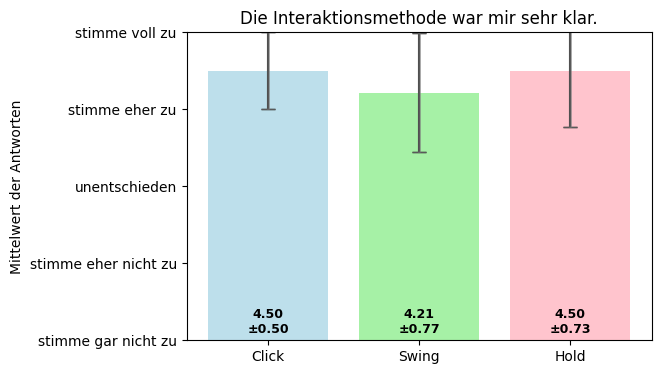

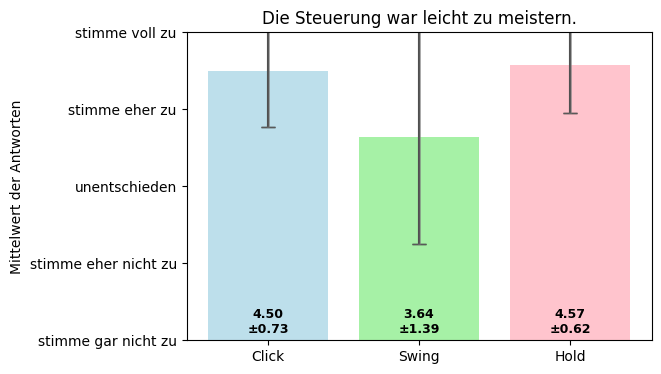

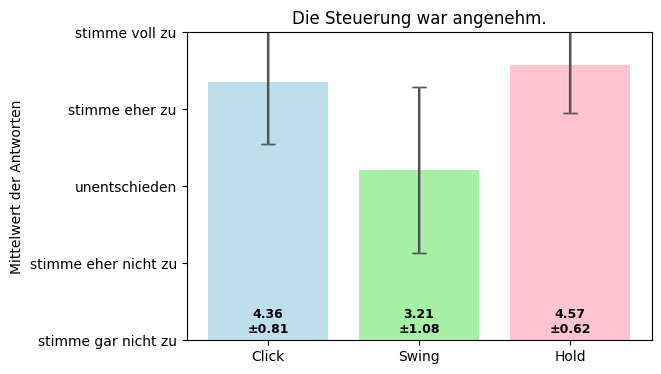

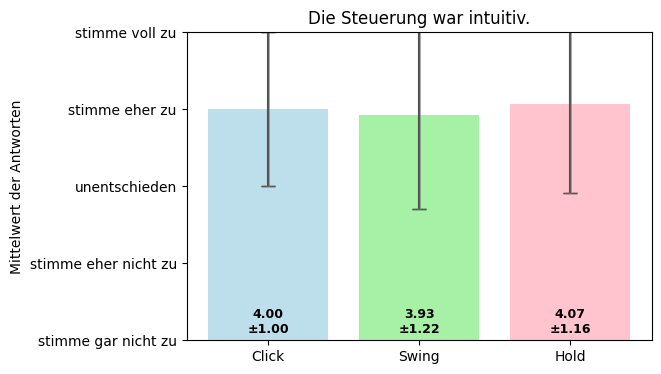

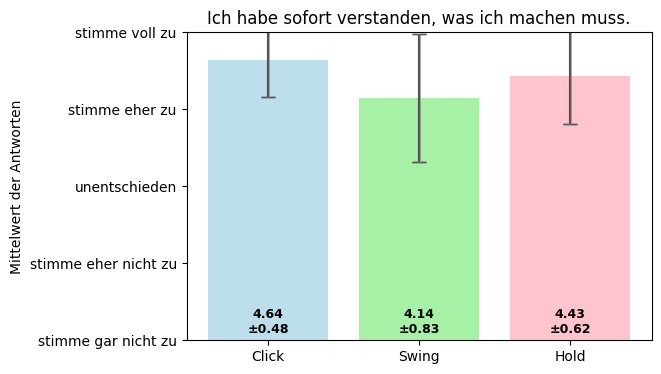

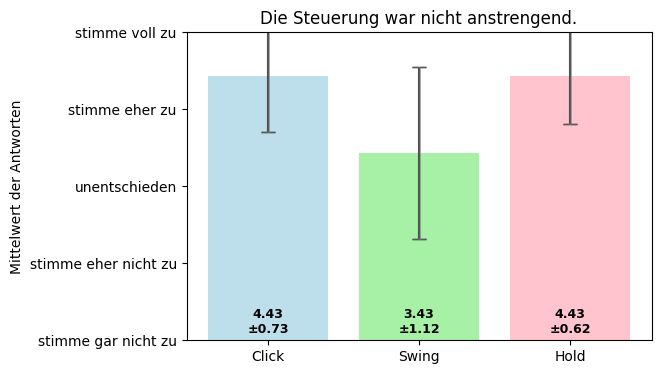

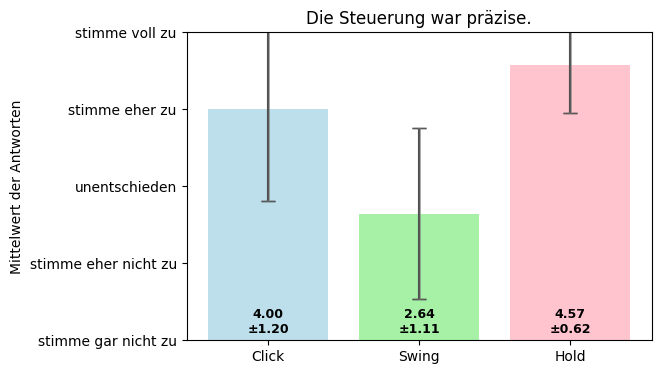

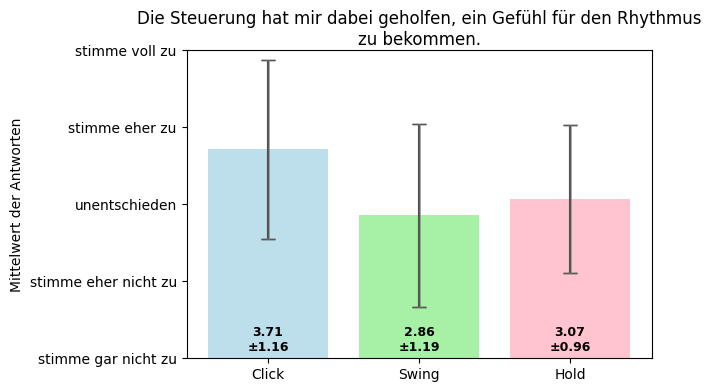

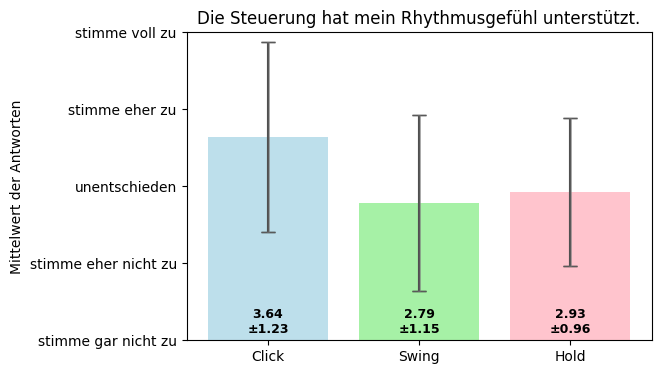

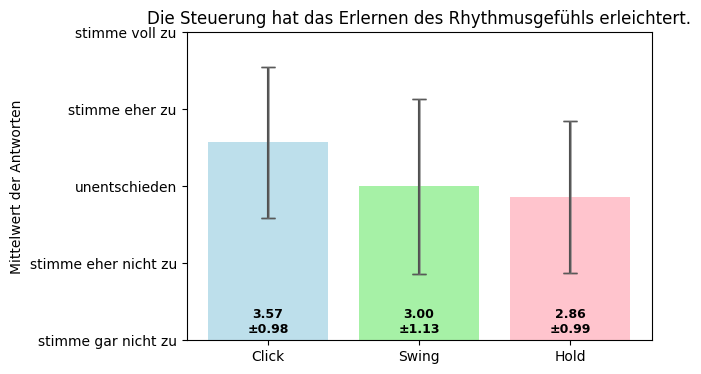

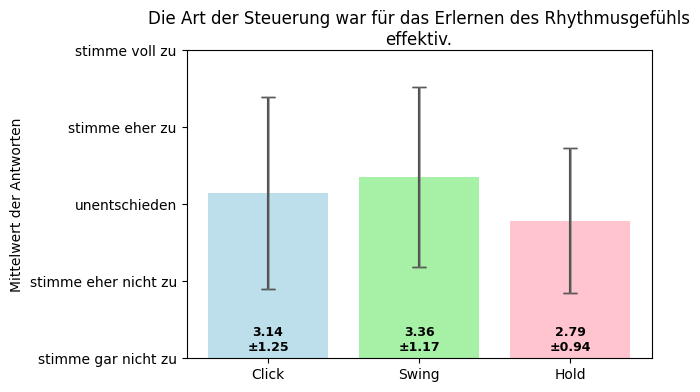

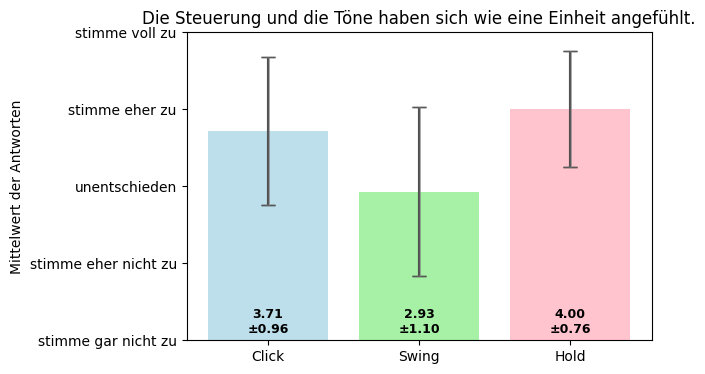

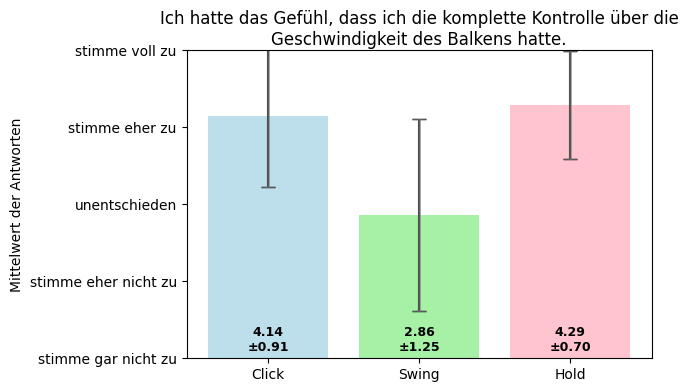

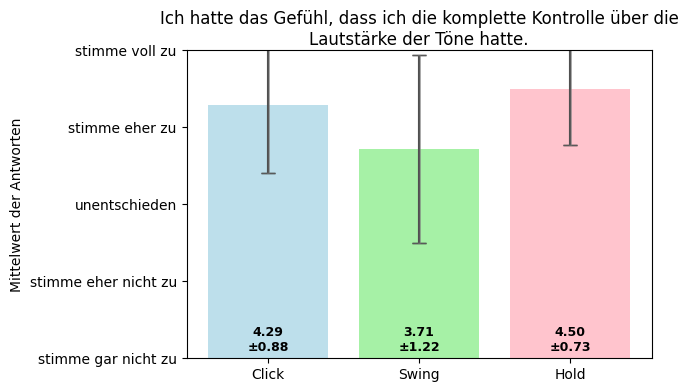

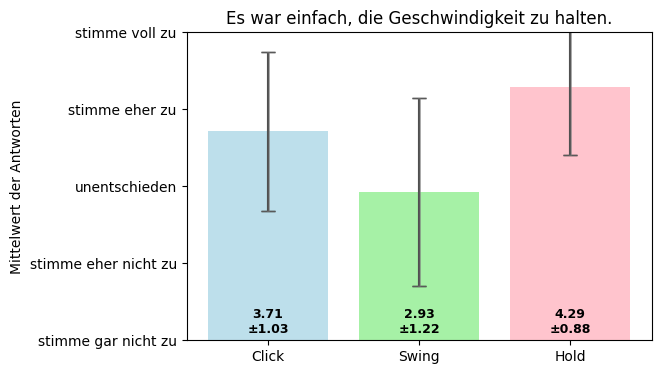

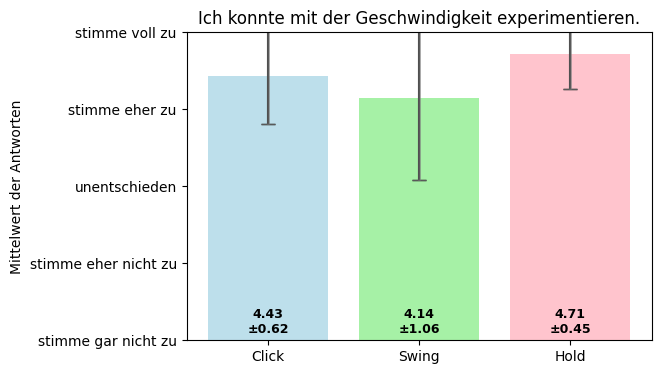

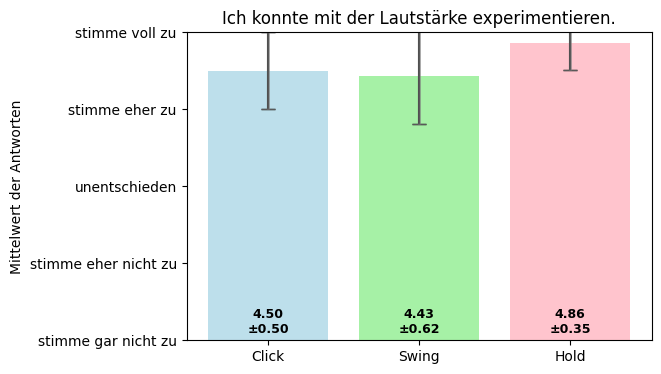

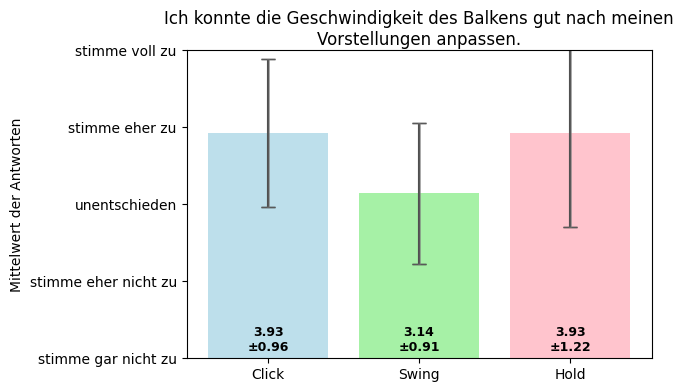

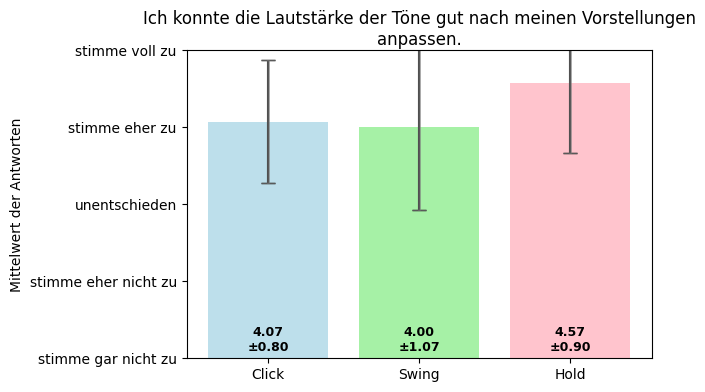

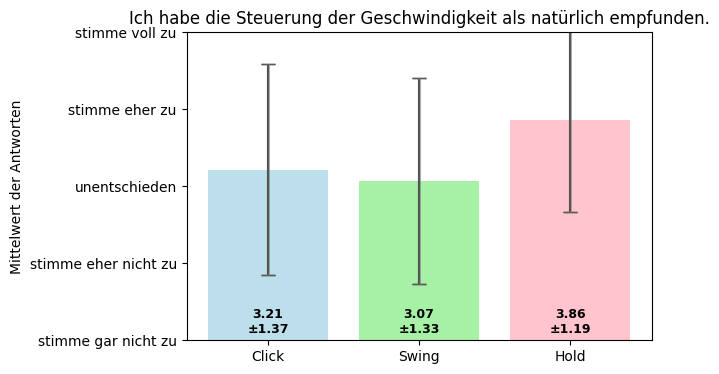

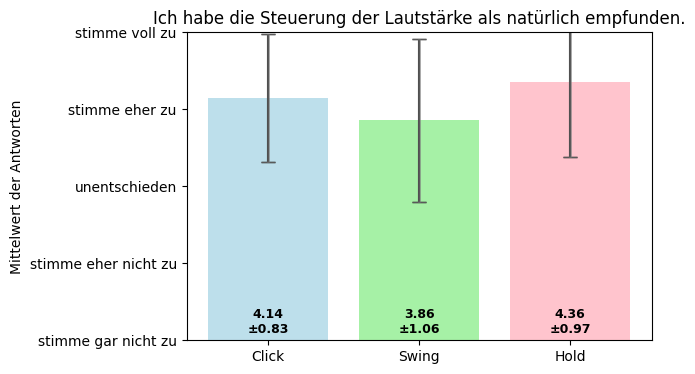

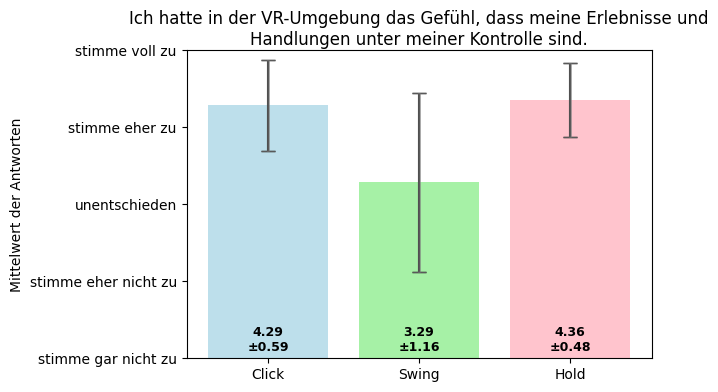

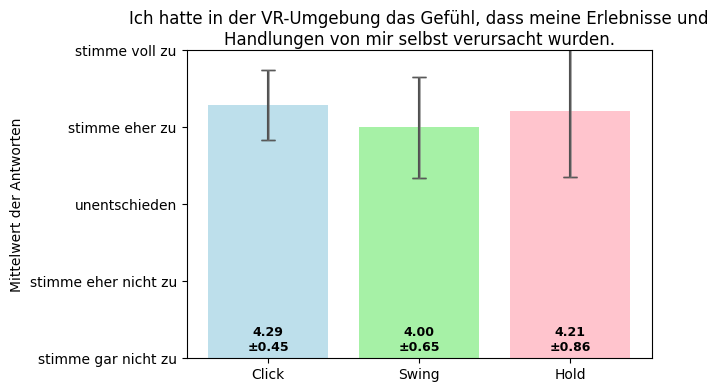

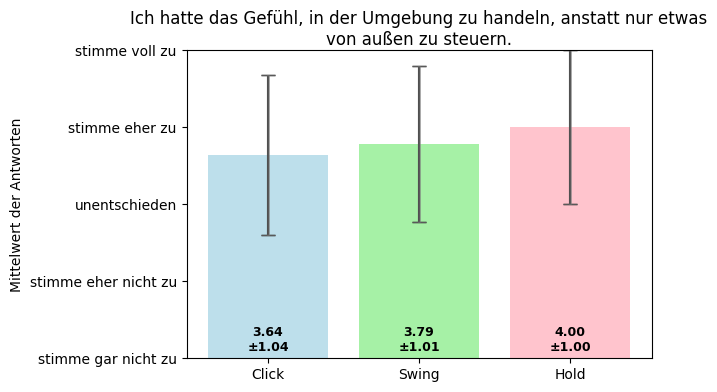

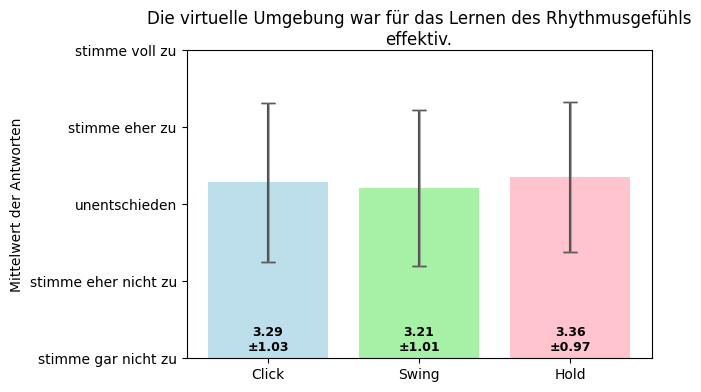

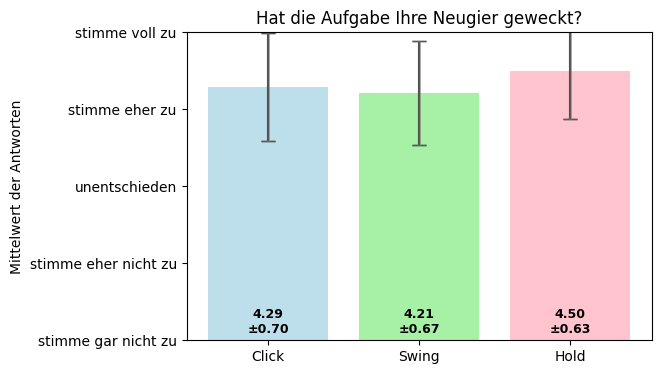

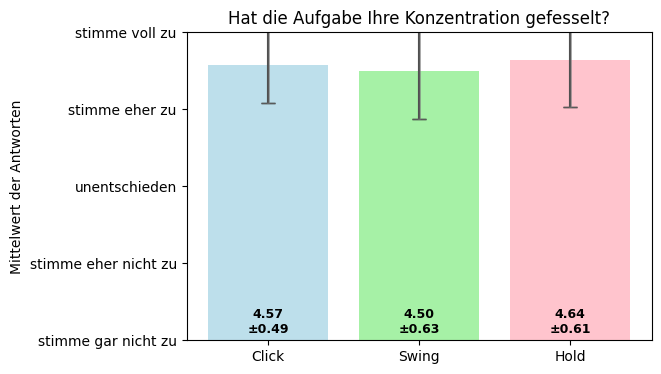

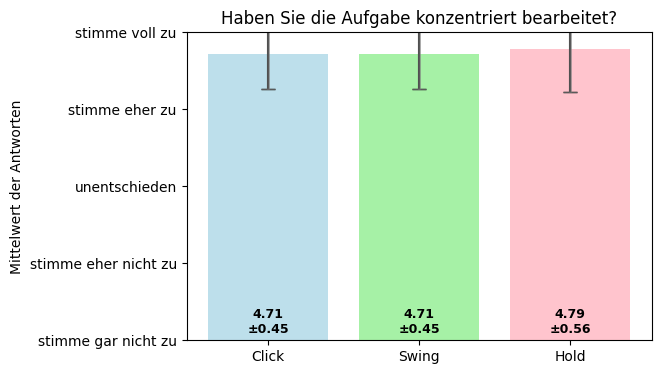

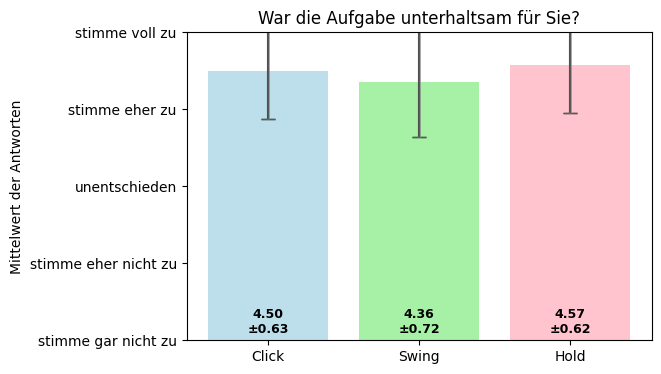

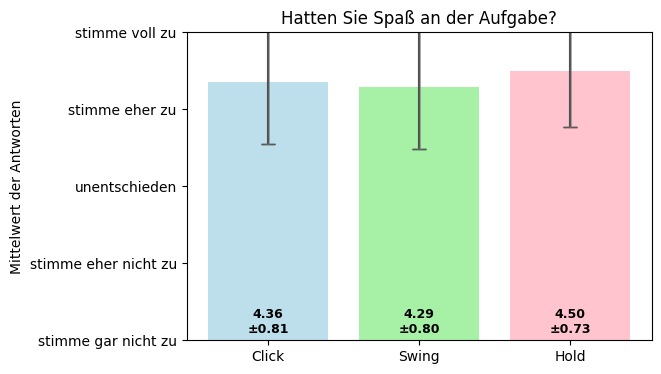

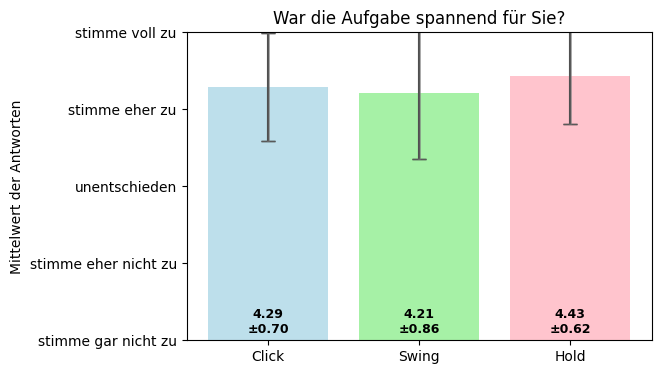

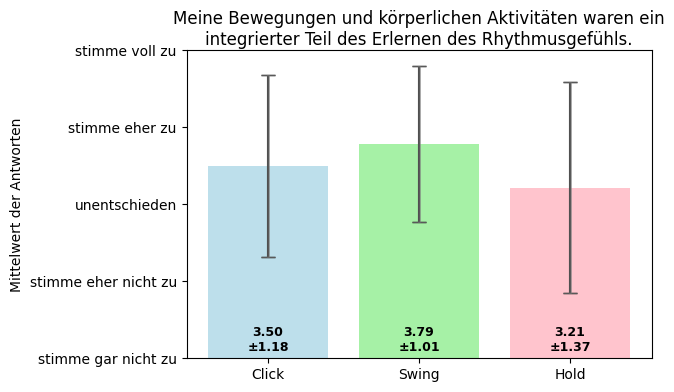

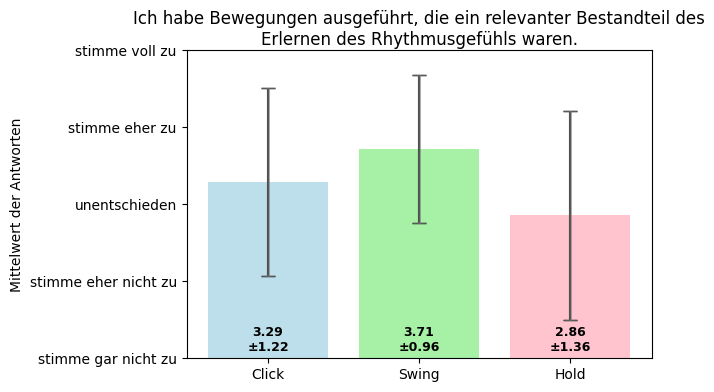

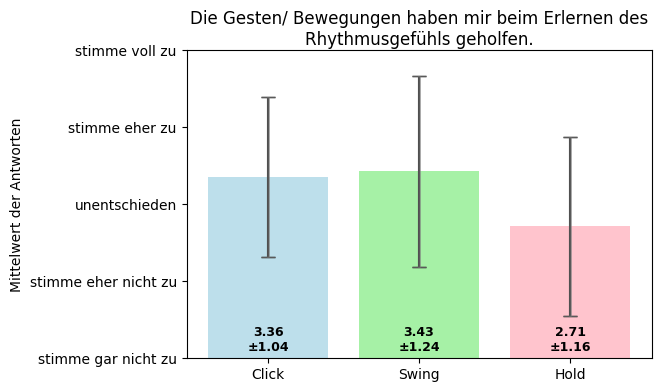

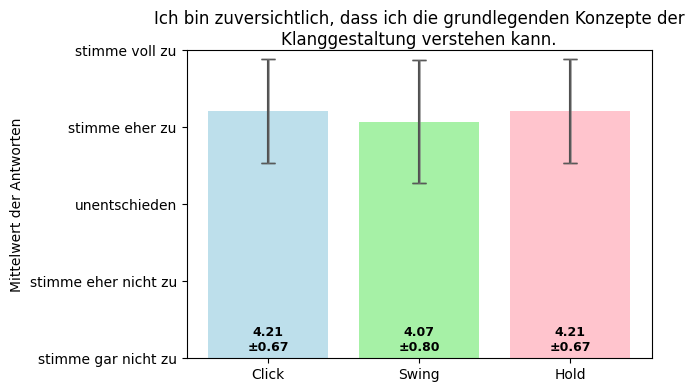

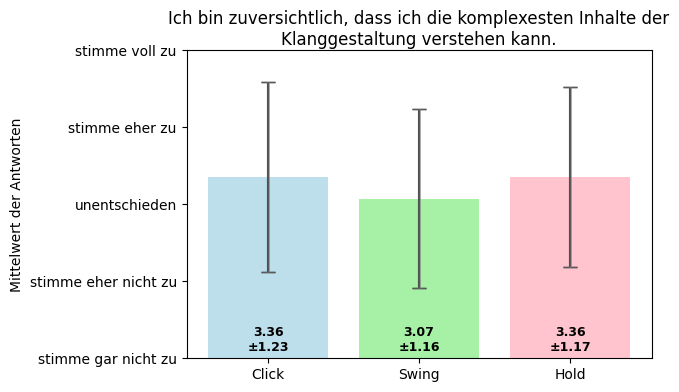

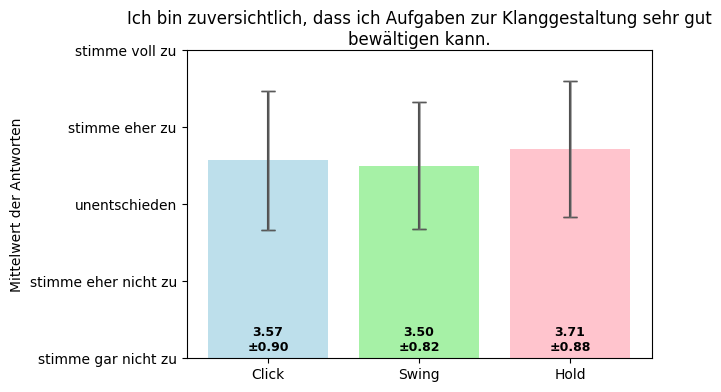

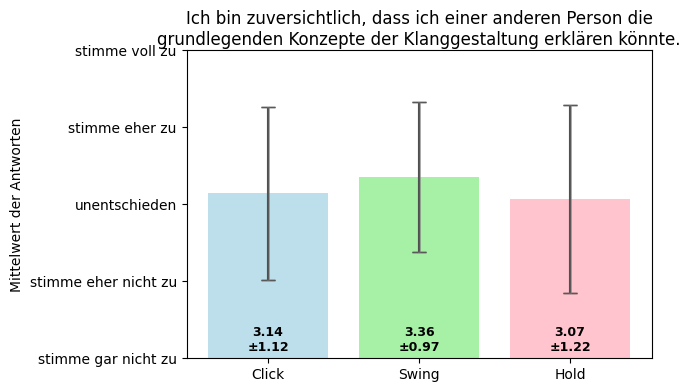

In [7]:
# für jede Frage Diagramm erstellen mit Mittelwert und Standardabweichung der Antworten für jeden Modus
# (Fragebögen zu den einzelnen Modi)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Likert-Skala für Beschriftung der Diagramme
likert_labels = {
    1: "stimme gar nicht zu",
    2: "stimme eher nicht zu",
    3: "unentschieden",
    4: "stimme eher zu",
    5: "stimme voll zu"
}

all_results = []

for skala, fragen_dict in fragen.items():
    for frage_nr, spalten in fragen_dict.items():
        
        results = {'Click': [], 'Hold': [], 'Swing': []}
        
        for vp, reihenfolge in reihenfolge_dict.items():
            # Reihenfolge der Modi für die aktuelle VP (immer unterschiedlich -> muss bei Auswertung der Werte beachtet werden!)
            modi = reihenfolge.split(", ")
            
            row = df.loc[df['VP'] == vp, spalten]
            if row.empty: continue
                
            werte = row.values.flatten().tolist()
            
            # Werte den Modi zuordnen
            for wert, modus in zip(werte, modi):
                if pd.notna(wert):
                    results[modus].append(wert)
                    
        
        # Für jeden Modus Mittelwert und Standardabweichung berechnen
        for modus, values in results.items():
            if values:
                all_results.append({
                    "Skala": skala,
                    "Frage": frage_nr,
                    "Modus": modus,
                    "Mean": np.mean(values),
                    "Std": np.std(values)
                })

summary_df = pd.DataFrame(all_results)

# für jede Frage ein Diagramm erstellen
for skala in summary_df['Skala'].unique():
    df_cat = summary_df[summary_df['Skala'] == skala]
    
    for frage_nr in df_cat['Frage'].unique():
        text = fragen_text.get(skala, {}).get(frage_nr, f"{skala} Frage {frage_nr}")
        df_plot = df_cat[df_cat['Frage'] == frage_nr]
        
        modus_order = ['Click', 'Swing', 'Hold']
        df_plot = df_plot.set_index('Modus').reindex(modus_order).reset_index()
        
        plt.figure(figsize=(6,4))
        colors = ['lightblue','lightgreen','lightpink']
        
        bars = plt.bar(
            df_plot['Modus'],
            df_plot['Mean'],
            yerr=df_plot['Std'],
            capsize=5,
            color=colors,
            alpha=0.8,
            label="Mittelwert"
        )
        
        for bar, std, mean in zip(bars, df_plot['Std'], df_plot['Mean']):
            plt.errorbar(
                bar.get_x() + bar.get_width()/2,
                mean,
                yerr=std,
                fmt='none',
                ecolor='gray',
                elinewidth=2,
                capsize=5,
                alpha=0.7,
                label="_nolegend_"
            )
            
            plt.text(
                bar.get_x() + bar.get_width()/2,
                1.05,  # leicht über der unteren Skala 1
                f"{mean:.2f}\n±{std:.2f}",
                ha='center',
                va='bottom',
                fontsize=9,
                fontweight='bold'
            )
        
        plt.ylabel("Mittelwert der Antworten")
        plt.ylim(1,5)
        plt.yticks(list(likert_labels.keys()), list(likert_labels.values()))
        plt.title(text, wrap=True)
        
        plt.show()


In [8]:
# Variablen und Fragen des vergleichenden Fragenbogens

vergleichsfragen = {
    
    'Steuerung': {
        "ST02_01": "Welcher Modus war am einfachsten zu bedienen?",
        "ST02_02": "Welcher Modus war am intuitivsten zu bedienen?",
        "ST02_03": "Steuerung Vergleich: Welcher Modus war am angenehmsten zu bedienen?",
        "ST02_04": "Steuerung Vergleich: Welcher Modus erforderte die wenigste Konzentration?",
        "ST02_05": "Bei welchem Modus hatten Sie den meisten Spaß?",
        "ST02_06": "Welchen Modus würden Sie am ehesten erneut verwenden?"
    },
    
    'Klanggestaltung': {
        "KG03_01": "Bei welchem Modus hatten Sie das Gefühl, die Geschwindigkeit am präzisesten steuern zu können?",
        "KG03_02": "Bei welchem Modus konnten Sie die Geschwindigkeit am besten halten?",
        "KG03_03": "Welchen Modus fanden Sie am besten geeignet für das Erlernen des Rhythmusgefühls?",
        "KG03_04": "Bei welchem Modus hatten Sie das beste Gefühl für den Rhythmus?",
        "KG03_05": "Bei welchem Modus konnten Sie am besten mit der Geschwindigkeit experimentieren?",
        "KG03_06": "Bei welchem Modus konnten Sie am besten mit der Lautstärke experimentieren?",
        "KG03_07": "Bei welchem Modus konnten Sie die Geschwindigkeit am besten nach Ihrem Empfinden gestalten?",
        "KG03_08": "Bei welchem Modus konnten Sie die Lautstärke am besten nach Ihrem Empfinden gestalten?"
    }

}



Steuerung:



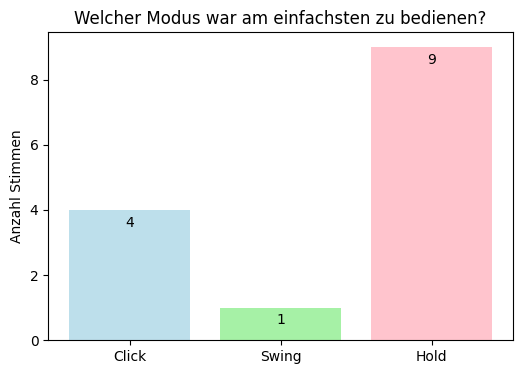

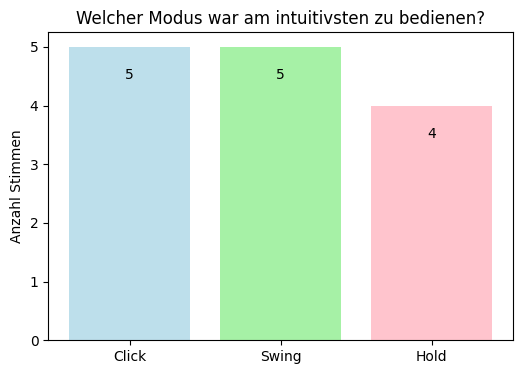

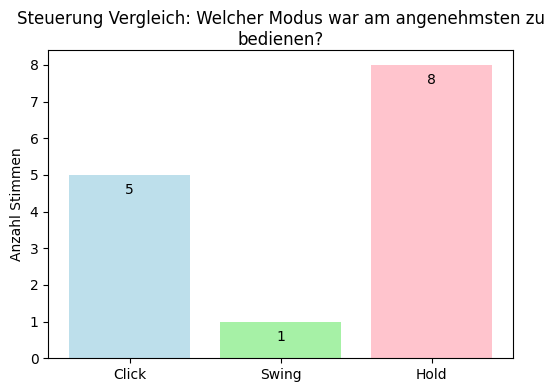

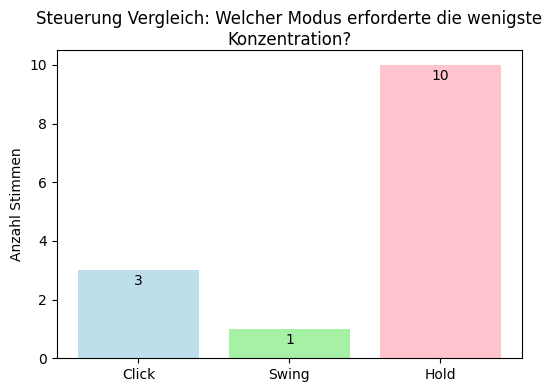

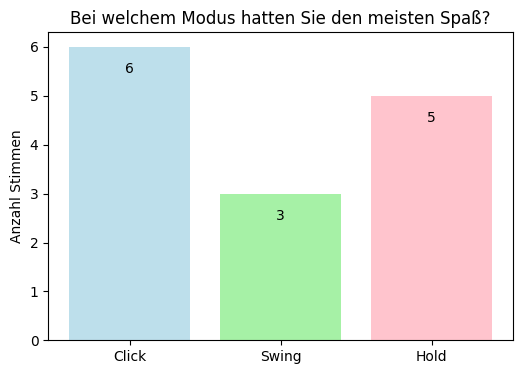

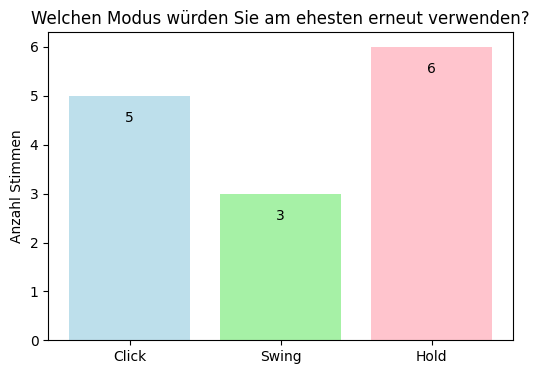


Klanggestaltung:



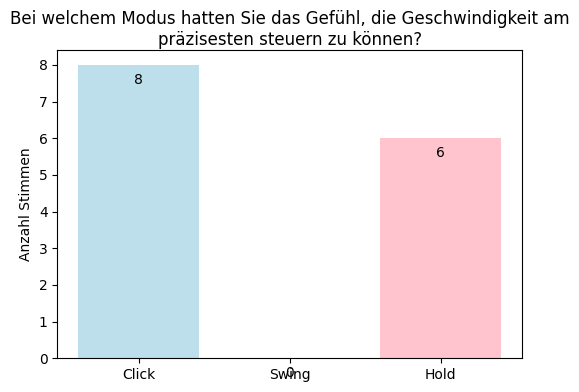

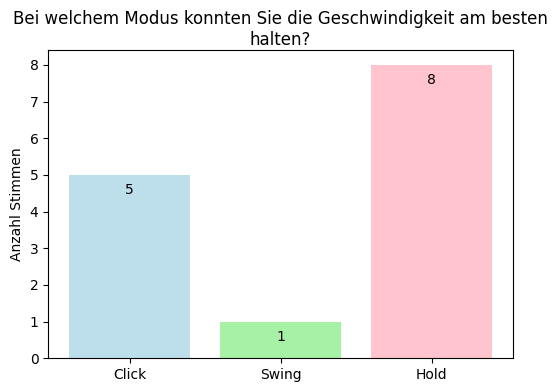

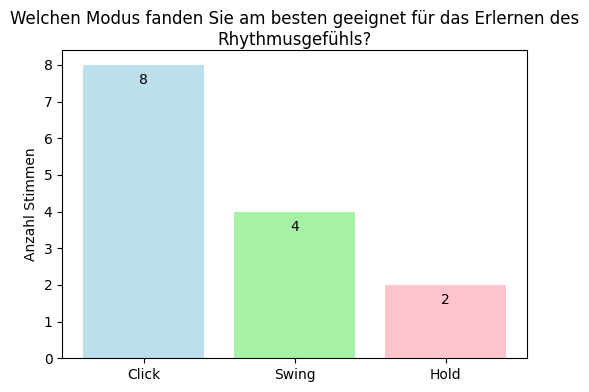

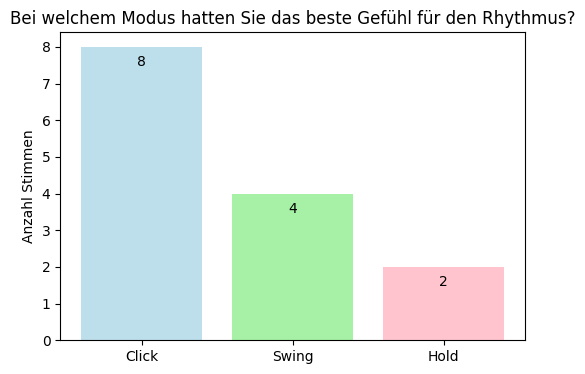

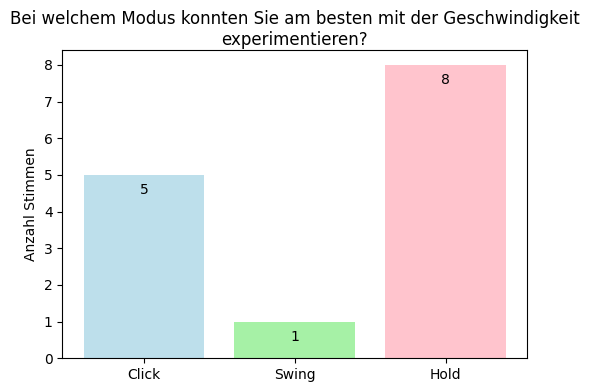

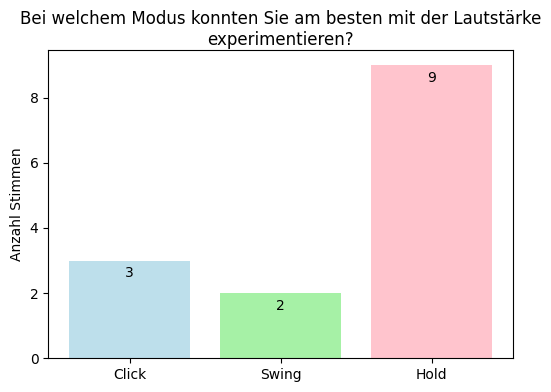

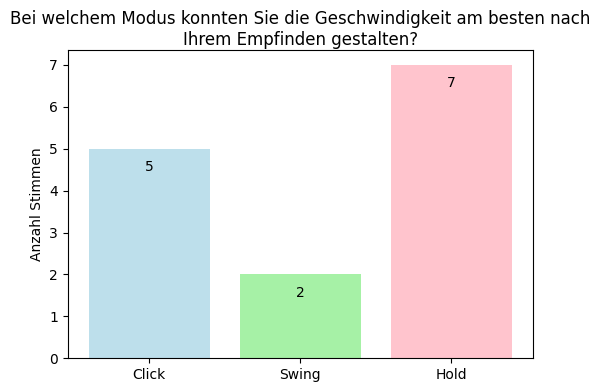

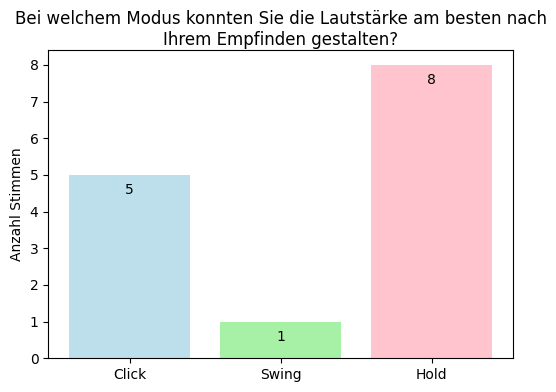

In [10]:
# Diagramme für vergleichende Fragen erstellen

import matplotlib.pyplot as plt

modus_labels = {1: 'Click', 2: 'Swing', 3: 'Hold'} # Zahlen, unter denen Modi in Excel-Datei gespeichert sind
colors = ['lightblue', 'lightgreen', 'lightpink']

for kategorie, fragen_dict in vergleichsfragen.items():
    print(f"\n{kategorie}:\n")
    
    for frage_id, frage_text in fragen_dict.items():

        werte = df[frage_id].dropna()
        
        # Anzahl der Stimmen pro Modus zählen
        counts = werte.value_counts().reindex([1,2,3], fill_value=0)
        
        # Diagramm erstellen
        plt.figure(figsize=(6,4))
        bars = plt.bar(
            [modus_labels[i] for i in counts.index],
            counts.values,
            color=colors,
            alpha=0.8
        )
        
        plt.ylabel("Anzahl Stimmen")
        plt.title(frage_text, wrap=True)
        
        for bar, count in zip(bars, counts.values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.6,
                     str(count), ha='center', va='bottom', fontsize=10)
        
        plt.show()


In [11]:
# Variablen und Fragen des allgemeinen Fragebogens

allgemeinefragen = {
    
    'Steuerung': {
        "ST04_01": "Die Steuerung der VR-Umgebung war einfach.",
        "ST04_02": "Ich habe die Steuerung schnell verstanden.",
        "ST04_03": "Die Steuerung wurde mir ausreichend erklärt.",
        "ST04_04": "Die Steuerung der VR-Umgebung war intuitiv.",
        "ST04_05": "Ich hatte keine Probleme bei der Steuerung.",
        "ST04_06": "Die VR-Umgebung hat die musikalischen Elemente anschaulich gemacht."
    },
    
    'CogLoadEnv': {
        "EC02_01": "Die virtuelle Umgebung enthielt viele irrelevante Inhalte.",
        "EC02_02": "Es war einfach, die relevanten Informationen in der virtuellen Umgebung zu finden."
    },
    
    'IntrinsicMotivation': {
        "IM03_01": "Ich arbeite gerne mit dem Gestalten von Klängen.",
        "IM03_02": "Ich finde das Thema sehr interessant."
    }

}

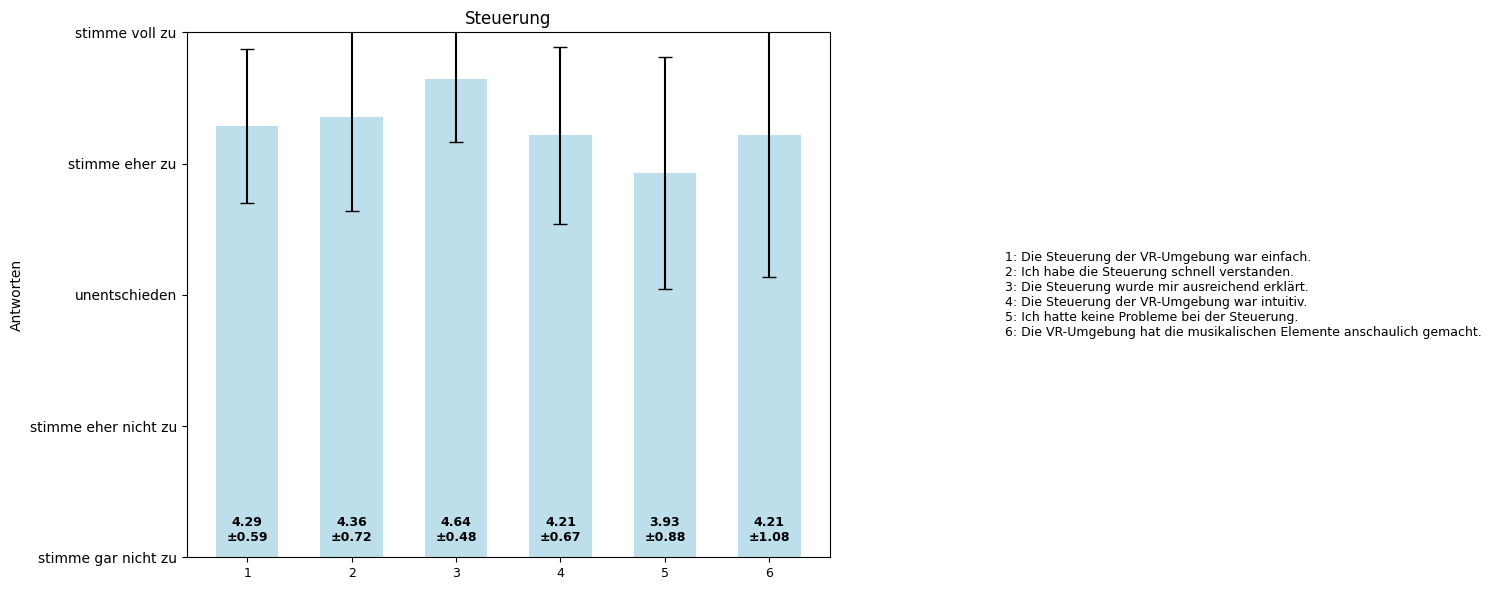

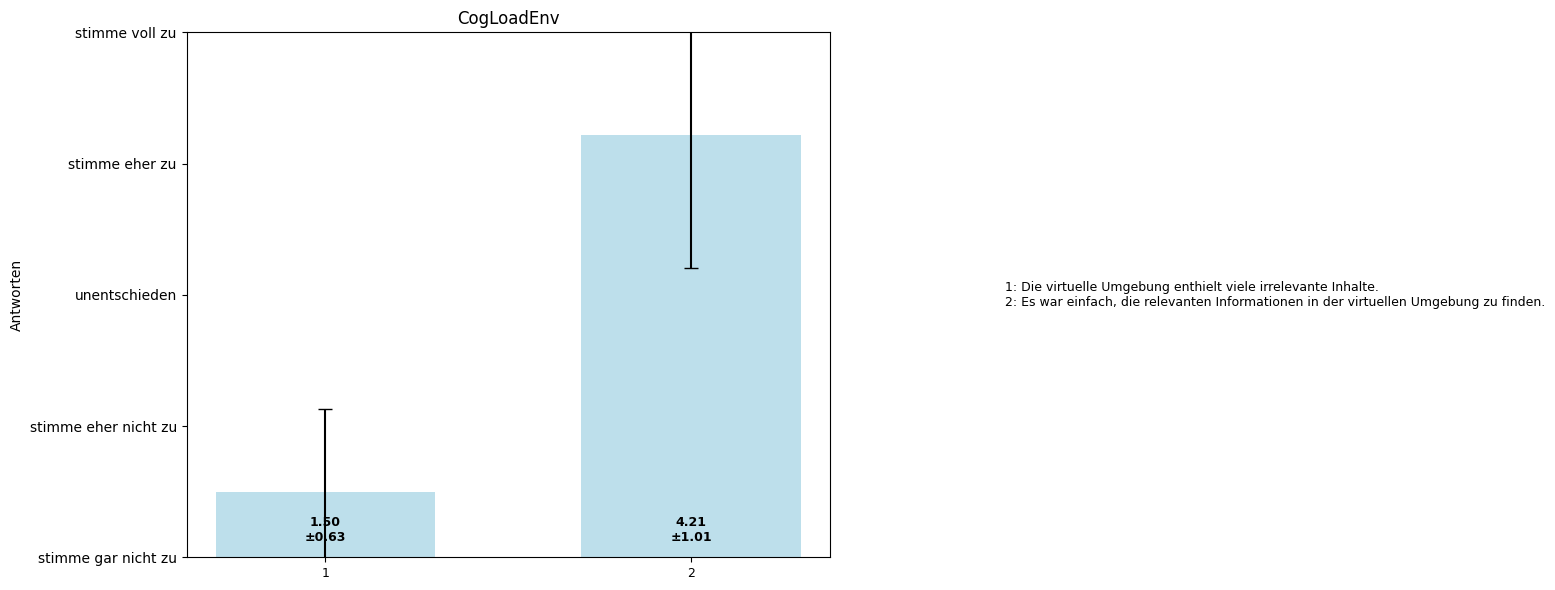

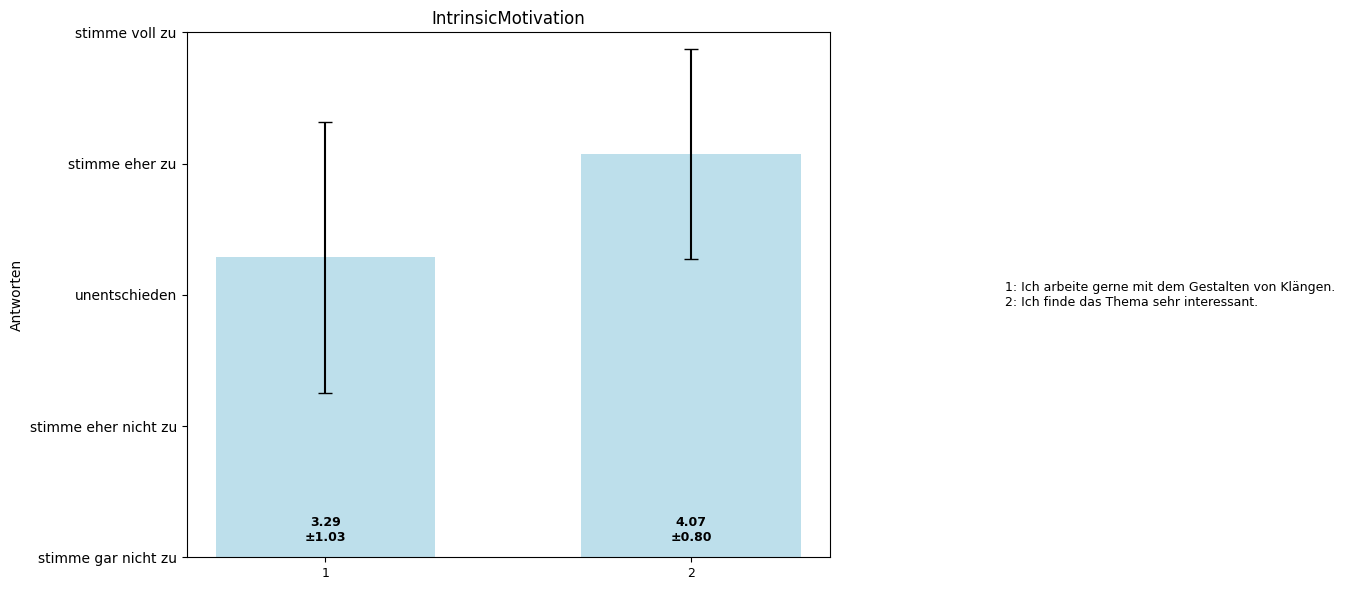

In [13]:
# Diagramme für allgemeine Fragen je Kategorie erstellen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Likert-Skala für Achsenbeschriftung
likert_labels = {
    1: "stimme gar nicht zu",
    2: "stimme eher nicht zu",
    3: "unentschieden",
    4: "stimme eher zu",
    5: "stimme voll zu"
}

fig_height = 6
min_fig_width = 10
max_fig_width = 25
bar_width = 0.6

for kategorie, fragen_dict in allgemeinefragen.items():
    fragen = []
    mean_values = []
    std_values = []
    frage_legende = {}
    
    for idx, (frage_nr, frage_text) in enumerate(fragen_dict.items(), start=1):
        werte = df[frage_nr].dropna().values.flatten().tolist()
        if not werte: continue
        mean_values.append(np.mean(werte))
        std_values.append(np.std(werte))
        fragen.append(f"{idx}")
        frage_legende[str(idx)] = frage_text
    
    if not fragen: continue
    
    n = len(fragen)
    
    fig_width = max(min_fig_width, min(max_fig_width, n * (bar_width + 0.3)))
    plt.figure(figsize=(fig_width, fig_height))
    
    x_pos = np.arange(n)
    bars = plt.bar(x_pos, mean_values, yerr=std_values, capsize=5, color='lightblue', alpha=0.8, width=bar_width)
    
    for i, b in enumerate(bars):
        plt.text(
            b.get_x() + b.get_width()/2,
            1.1,
            f"{mean_values[i]:.2f}\n±{std_values[i]:.2f}",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',
        )
    
    plt.ylim(1,5)
    plt.xticks(x_pos, fragen, rotation=0, fontsize=9)
    plt.yticks(list(likert_labels.keys()), list(likert_labels.values()))
    plt.title(kategorie)
    plt.ylabel("Antworten")
    
    # Legende für Fragen
    legend_text = "\n".join([f"{num}: {text}" for num, text in frage_legende.items()])
    plt.gcf().text(1.01, 0.5, legend_text, fontsize=9, va='center')
    
    plt.tight_layout(rect=[0,0,0.85,1])
    plt.show()
